<a href="https://colab.research.google.com/github/BriefCud/PRA3024-Big-Data-in-Physics/blob/master/LHCb_Part_1_%26_Exercise_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.

Before we start - we have to use Python2 (not Python 3), so we should choose this as an option in "Runtime" -> "Change Runtime Type" at the top.

In [0]:
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

--2020-03-03 21:50:26--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.1’

root_v6.13.08.Linux 100%[===================>] 131.05M  18.4MB/s    in 8.2s    

2020-03-03 21:50:35 (16.1 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.1’ saved [137415272/137415272]



In [0]:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

#ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libPyRoot.so')

# ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 55abb4d5f900 at 7f9642aa2290>

In [0]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data from CERN:

In [0]:
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root

--2020-03-03 21:55:16--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.184.28.138, 188.185.82.144, 188.184.93.89, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.184.28.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root.2’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  15.6MB/s    in 38s     

2020-03-03 21:55:55 (11.3 MB/s) - ‘B2HHH_MagnetUp.root.2’ saved [444723234/444723234]



In [0]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",0,10000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",0,10000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",0,10000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. We have to use some detective work to extract the information we need on the original physics process at play.


Let's get started with working with this data:

# Exercises

## Part 1

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We need to first combine this into a single measurement

In [0]:

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

#########------------ Imports ------------################
import numpy as np

#Open ROOT file
data = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")

#Get the decay tree
tree=data.Get("DecayTree")


#########------------ Declaring functions ------------################
def GetString(daughter):

  string = "sqrt("+daughter+"_PX**2 + "+daughter+"_PY**2 + "+daughter+"_PZ**2)"
  # , daughter+" Momentum",0,10000,"MeV/c"

  return string



Now plot the total momentum for one (or more) of the daughter particles.

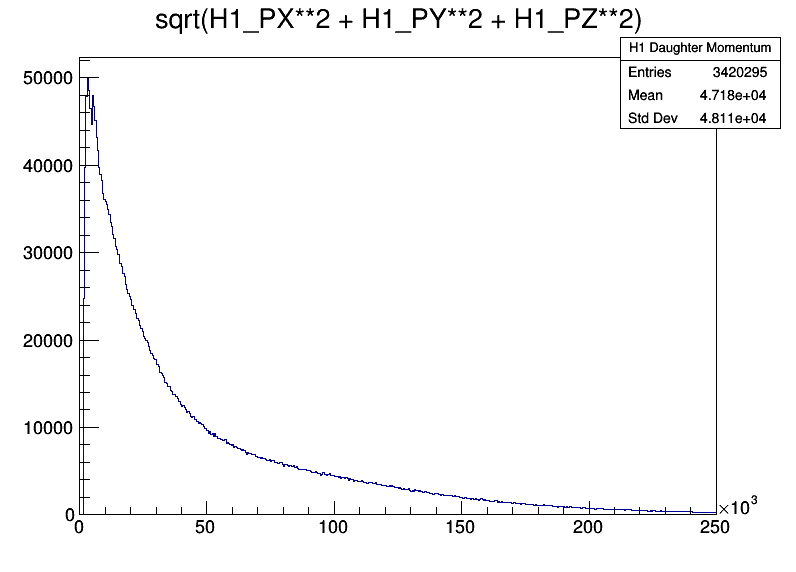

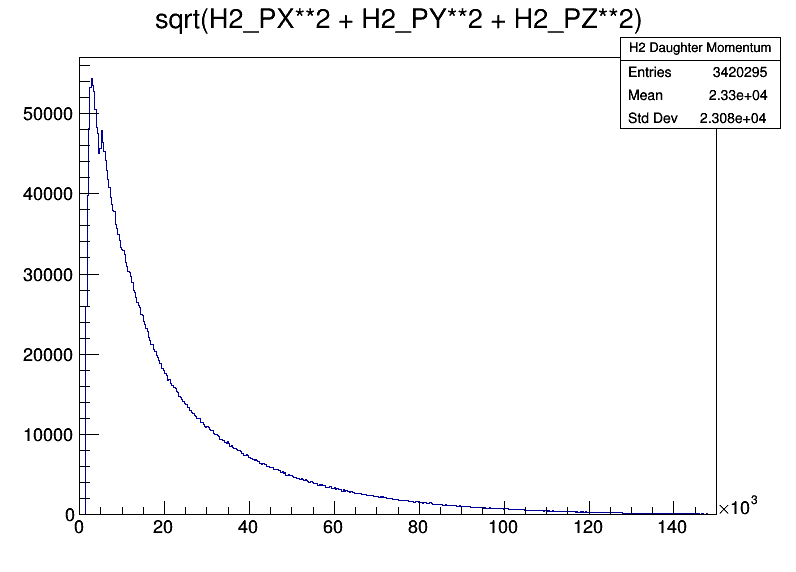

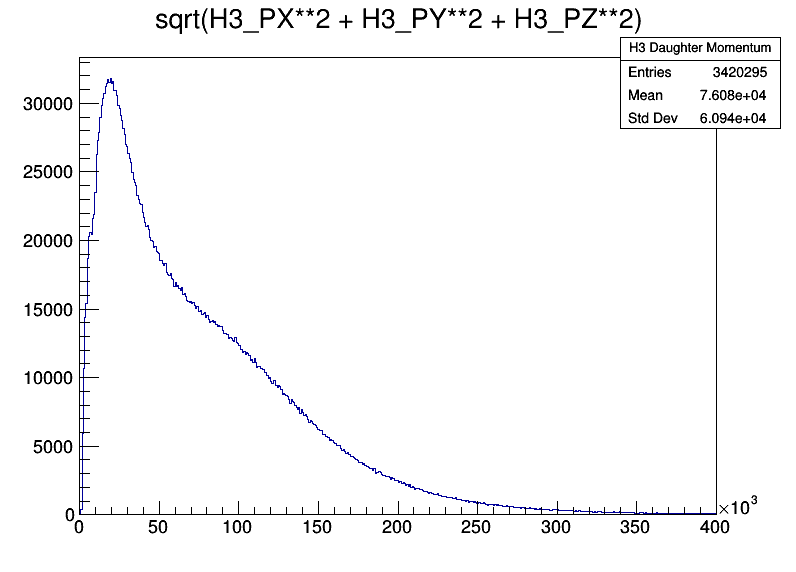

In [0]:
#use the histogram plotting tools, call your function to find the total momentum and then plot it!

array = []
for i in range(1,4):
  array.append("H"+str(i))

#########------------ H1 daughter ------------################
string = GetString(array[0])
a = ROOT.TCanvas(str(array[0])+"H1 Daughter","H1",800,600)
tree.Draw(str(string)+">>H1 Daughter Momentum(500,0,250000)")
histogram1 = ROOT.gDirectory.Get("H1 Daughter Momentum")
a.Draw()

#########------------ H2 daughter ------------################
string = GetString(array[1])
b = ROOT.TCanvas(str(array[1])+"H2 Daughter","H2",800,600)
tree.Draw(str(string)+">>H2 Daughter Momentum(500,0,150000)")
histogram2 = ROOT.gDirectory.Get("H2 Daughter Momentum")
b.Draw()

#########------------ H3 daughter ------------################
string = GetString(array[2])
c = ROOT.TCanvas(str(array[2])+"H3 Daughter","H3",800,600)
tree.Draw(str(string)+">>H3 Daughter Momentum(500,0,400000)")
histogram3 = ROOT.gDirectory.Get("H3 Daughter Momentum")
c.Draw()

The next step is to use the total momentum of the Kaon and its invarient mass (found with a small amount of research) and your relativity knowledge to get an equation for the energy of the Kaon. 

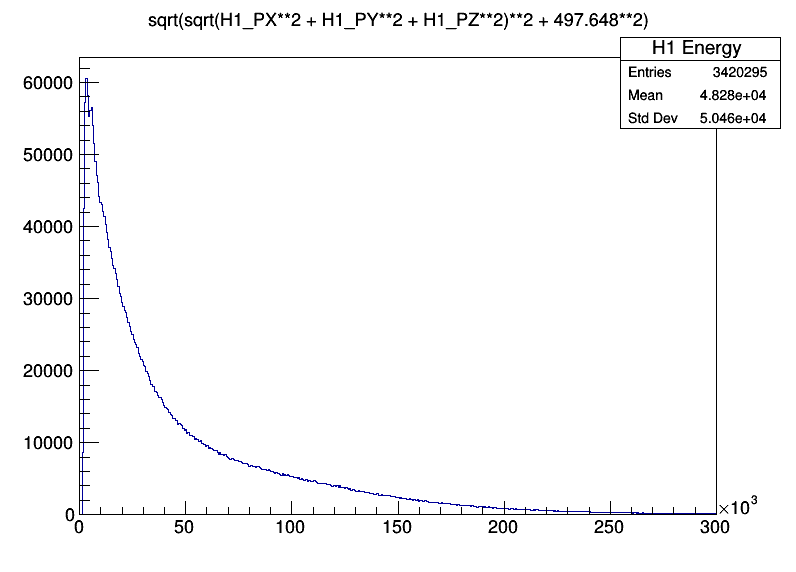

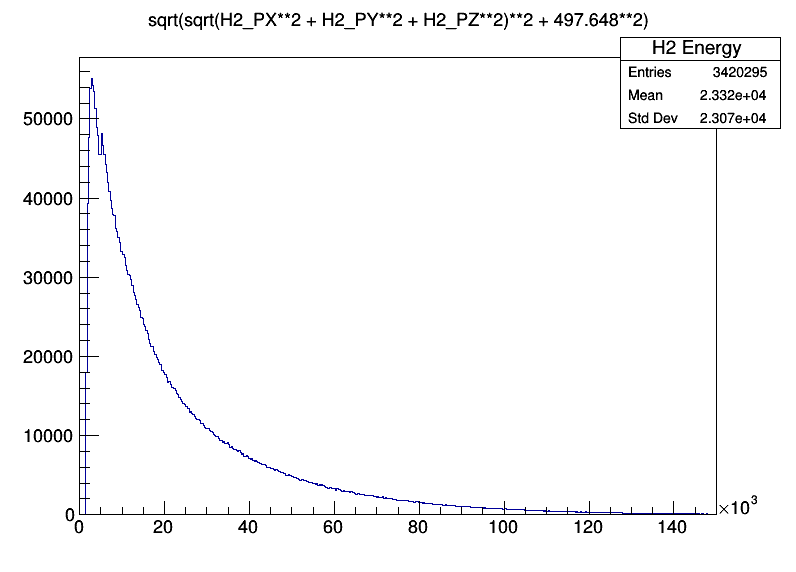

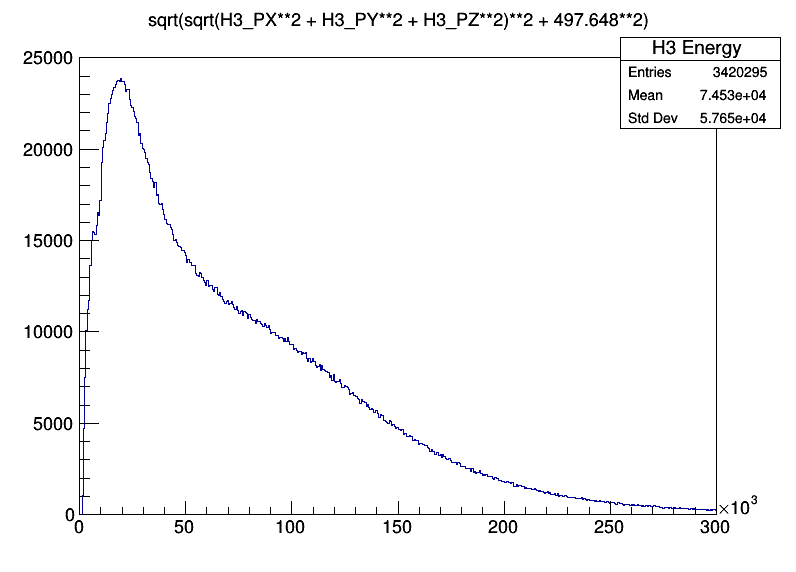

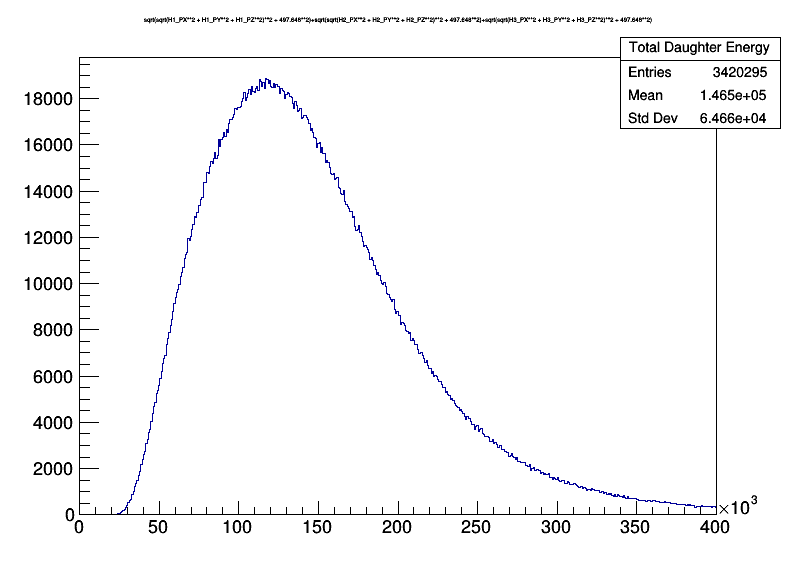

In [0]:
#let's make a function to find the energy of a Kaon, if you add in the total momentum found in the previous steps - you should be able to do so reasonably easily

#mass of a kaon
massKaon = 497.648 #MeV*c^-2

# momentumArray = []

# for i in range(len(array)):
#   momentum = ROOT.RooRealVar(str(GetString(str(array[i]))), str(array[i])+" Momentum",0,10000,"MeV/c")
#   momentumArray.append(momentum)
#   dataSet = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(momentum, "1==1"))

def GetStringEnergy(p, massKaon):
  #where p is the momentum of the Kaon
  energy = "sqrt("+p+"**2 + "+str(massKaon)+"**2)"
  return energy

#########------------ H1 energy ------------################
string = GetStringEnergy(GetString("H1"), massKaon)
d = ROOT.TCanvas(str(array[0])+" Kaon Energy","H1 Energy",800,600)
tree.Draw(str(string)+">>H1 Energy(500,0,300000)")
histogram4 = ROOT.gDirectory.Get("H1 Energy")
d.Draw()

#########------------ H2 energy ------------################
string = GetStringEnergy(GetString("H2"), massKaon)
e = ROOT.TCanvas(str(array[1])+" Kaon Energy","H2 Energy",800,600)
tree.Draw(str(string)+">>H2 Energy(500,0,150000)")
histogram5 = ROOT.gDirectory.Get("H2 Energy")
e.Draw()

#########------------ H3 energy ------------################
string = GetStringEnergy(GetString("H3"), massKaon)
f = ROOT.TCanvas(str(array[2])+" Kaon Energy","H3 Energy",800,600)
tree.Draw(str(string)+">>H3 Energy(500,0,300000)")
histogram6 = ROOT.gDirectory.Get("H3 Energy")
f.Draw()

#########------------ Total energy  (H1 + H2 + H3)------------################
g = ROOT.TCanvas("Total Kaon Energy","Total Energy",800,600)
tree.Draw(GetStringEnergy(GetString("H1"), massKaon)+"+"+GetStringEnergy(GetString("H2"), massKaon)+"+"+GetStringEnergy(GetString("H3"), massKaon)+">>Total Daughter Energy(500,0,400000)")
histogram7 = ROOT.gDirectory.Get("Total Daughter Energy")
g.Draw()

We have now completed the initial steps and begun to work through what we need to with the data. This workflow is divided into 4 stages, just for easier viewing and comprehension.

## Part 2

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Total Energy of B meson
Warning in <TCanvas::Constructor>: Deleting canvas with same name: B meson Momentum
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Daughter Kaon Probabilities
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Daughter Pion Probabilities
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Vertex (chi) 𝜒2
Error in <TSelectorDraw::Begin>: Two open or close brackets found, hname=Vertex (chi) 𝜒2(100,0,10)


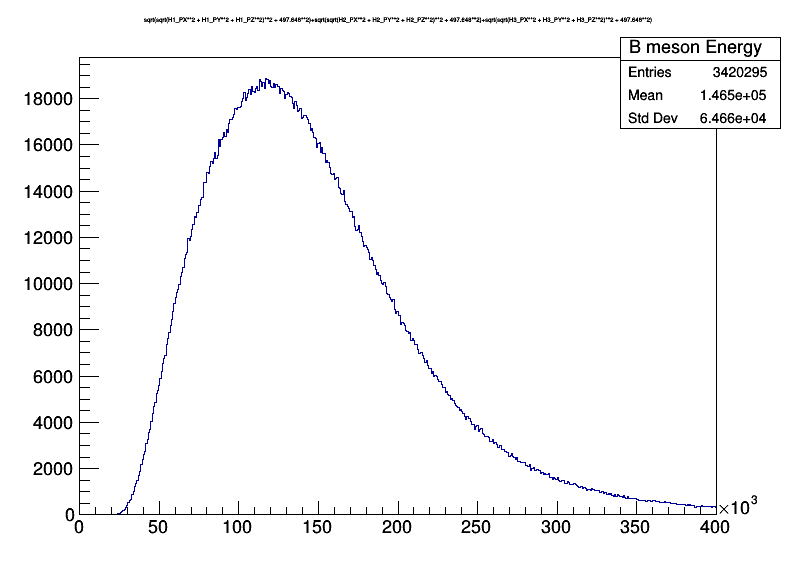

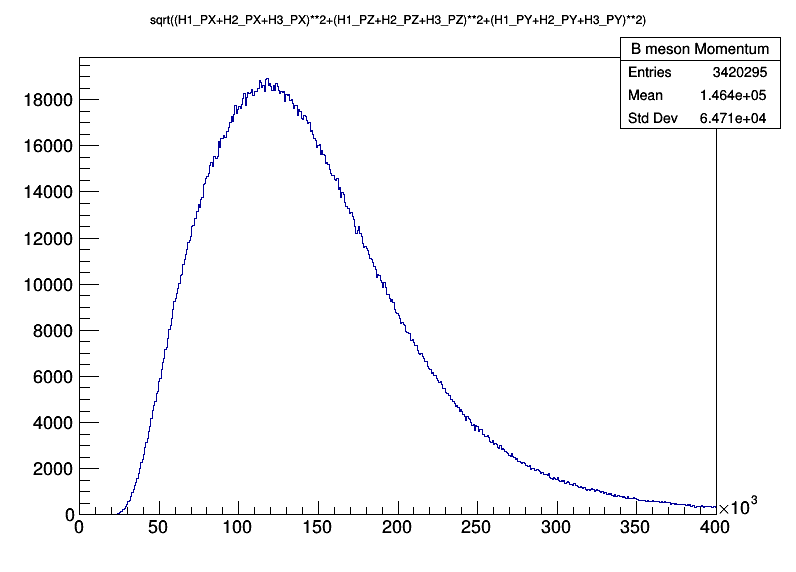

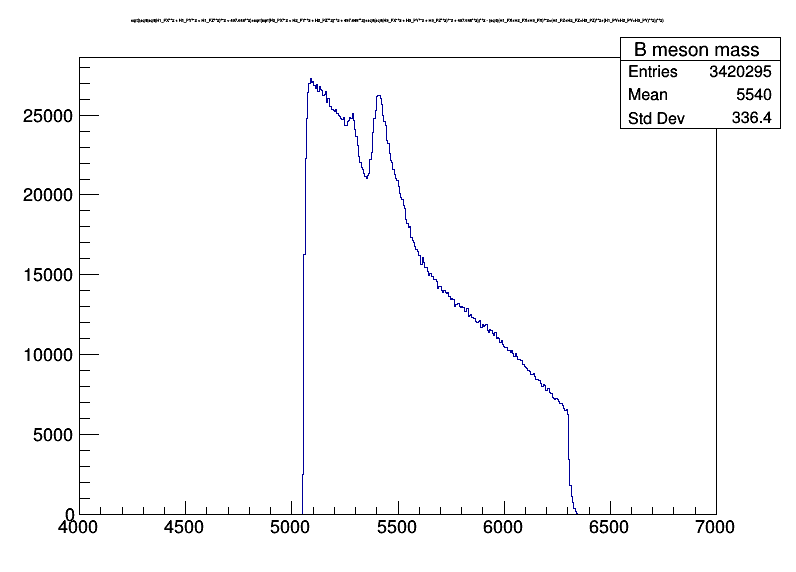

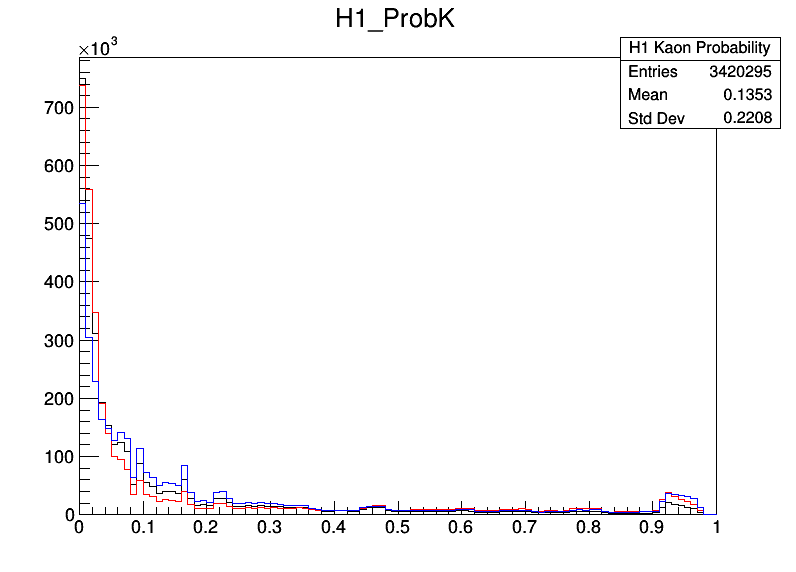

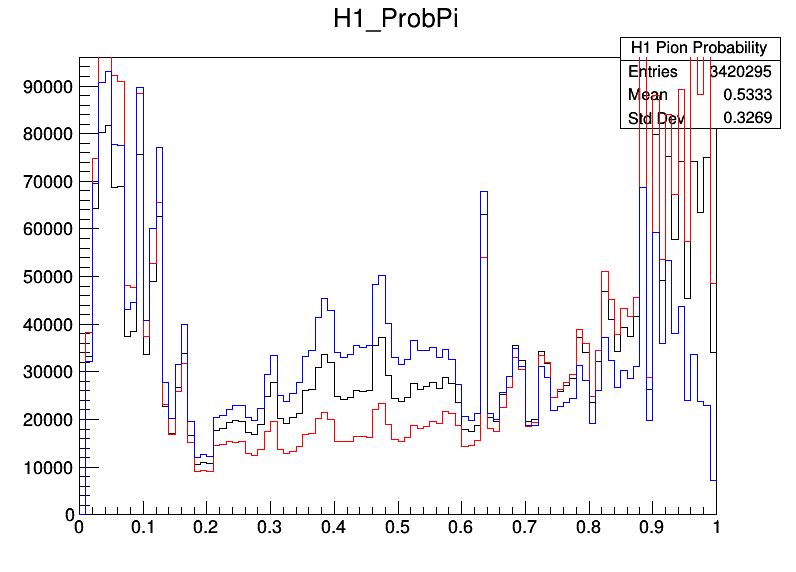

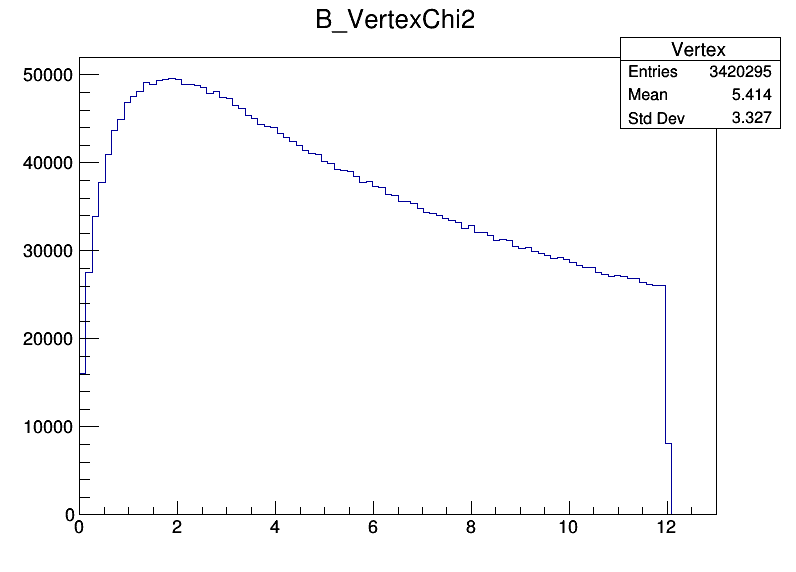

In [0]:
#Calculate the energy of the B meson, using the conservation of energy - just combine the energies to give a total

#########------------ Total energy of B meson ------------################
energyString = GetStringEnergy(GetString("H1"), massKaon)+"+"+GetStringEnergy(GetString("H2"), massKaon)+"+"+GetStringEnergy(GetString("H3"), massKaon)
h = ROOT.TCanvas("Total Energy of B meson","B meson Energy",800,600)
tree.Draw(str(energyString)+">>B meson Energy(500,0,400000)")
histogram8 = ROOT.gDirectory.Get("B meson Energy")
h.Draw()

#Calculate the momentum of the B meson. To do this, you need to first combine all the x momenta of the daughters,
#to get a total x momentum of the mother; then you can combine your three momenta into total momentum

def GetSumMomentumInOnePlane(coord):

  if (coord == "X" or coord == "Y" or coord == "Z"):
    string = "(H1_P"+str(coord)+"+H2_P"+str(coord)+"+H3_P"+str(coord)+")**2"

    return string
  else:
    print("Invalid Input for coord")

pSumX = GetSumMomentumInOnePlane("X")
pSumY = GetSumMomentumInOnePlane("Z")
pSumZ = GetSumMomentumInOnePlane("Y")

momentumString = "sqrt("+str(pSumX)+"+"+str(pSumY)+"+"+str(pSumZ)+")"

#########------------ Momentum of B meson ------------################
l = ROOT.TCanvas("B meson Momentum","B meson Momentum",800,600)
tree.Draw(str(momentumString)+">>B meson Momentum(500,0,400000)")
histogram9 = ROOT.gDirectory.Get("B meson Momentum")
l.Draw()

#Use the energy of the B meson and momentum of the B meson as inputs and
#calculate the mass of the B meson (Found by analysis of the daughter products)

def CalculateMass(momentumString, energyString):
  # mass = sqrt(energy**2 - momentum**2)
  massString = "sqrt(("+str(energyString)+")**2 - ("+str(momentumString)+")**2)"
  return massString

#########------------ Mass of B meson ------------################
#Now plot a histogram of the range of masses of the B meson.
m = ROOT.TCanvas("B meson mass","B meson mass",800,600)
tree.Draw(str(CalculateMass(momentumString, energyString))+">>B meson mass(500,4000,7000)")
histogram10 = ROOT.gDirectory.Get("B meson mass")
m.Draw()


#Does this match what we would expect from theory?
'''
Answer: It does match the theory because mean is 5540
'''


def GetProbabilityString(index):
  if (index == 1 or index == 2 or index ==3):
    string1 = "H"+str(index)+"_ProbK"
    string2 = "H"+str(index)+"_ProbPi"
    return string1,string2
  else:
    print("Invalid index")

#Make plots of H1/H2/H3 _ProbK on one plot

n = ROOT.TCanvas("Daughter Kaon Probabilities","Daughter Kaon Probabilities",800,600)
tree.Draw(str(GetProbabilityString(1)[0])+">>H1 Kaon Probability(100,0,1)")
tree.Draw(str(GetProbabilityString(2)[0])+">>H2 Kaon Probability(100,0,1)")
tree.Draw(str(GetProbabilityString(3)[0])+">>H3 Kaon Probability(100,0,1)")
histogram11 = ROOT.gDirectory.Get("H1 Kaon Probability")
histogram12 = ROOT.gDirectory.Get("H2 Kaon Probability")
histogram13 = ROOT.gDirectory.Get("H3 Kaon Probability")
histogram11.SetLineColor(1)
histogram12.SetLineColor(2)
histogram13.SetLineColor(4)
histogram11.Draw()
histogram12.Draw('Same')
histogram13.Draw('Same')
n.Draw()

#Make plots of H1/H2/H3 _ProbPi on one plot

o = ROOT.TCanvas("Daughter Pion Probabilities","Daughter Pion Probabilities",800,600)
tree.Draw(str(GetProbabilityString(1)[1])+">>H1 Pion Probability(100,0,1)")
tree.Draw(str(GetProbabilityString(2)[1])+">>H2 Pion Probability(100,0,1)")
tree.Draw(str(GetProbabilityString(3)[1])+">>H3 Pion Probability(100,0,1)")
histogram14 = ROOT.gDirectory.Get("H1 Pion Probability")
histogram15 = ROOT.gDirectory.Get("H2 Pion Probability")
histogram16 = ROOT.gDirectory.Get("H3 Pion Probability")
histogram14.SetLineColor(1)
histogram15.SetLineColor(2)
histogram16.SetLineColor(4)
histogram14.Draw()
histogram15.Draw('Same')
histogram16.Draw('Same')
o.Draw()

#For all our particles, make a plot of the B_VertexChi2

p = ROOT.TCanvas("Vertex (chi) 𝜒2","Vertex (chi) 𝜒2",800,600)
tree.Draw(str("B_VertexChi2>>Vertex (chi) 𝜒2(100,0,10)"))
histogram17 = ROOT.gDirectory.Get("Vertex (chi) 𝜒2")
p.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: B meson mass Post-Cuts


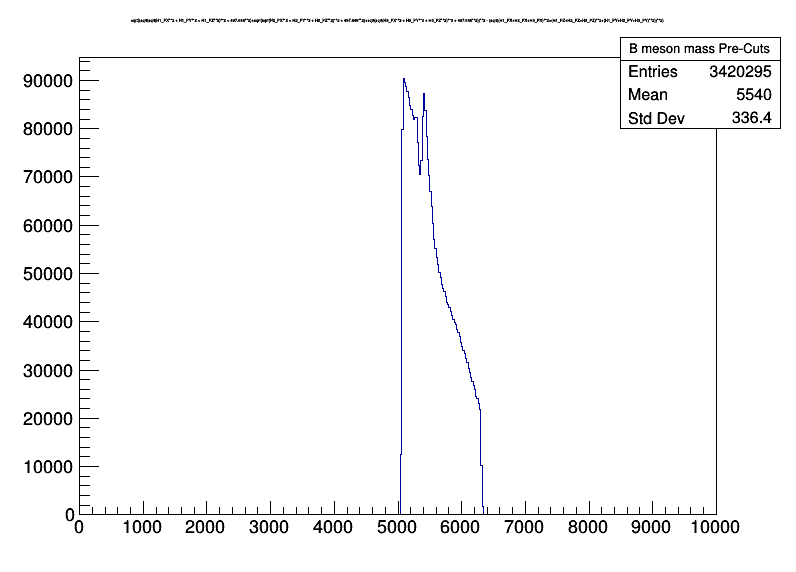

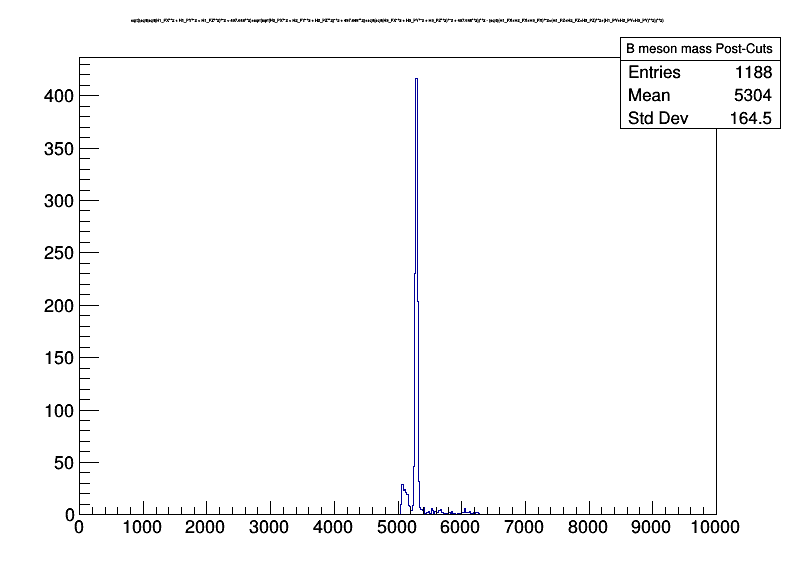

In [0]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
#This is not a good choice of selection - you should make your own :)

#selection=("H1_ProbPi>0.9&H2_ProbPi>0.9&H3_ProbPi>0.9&!H1_isMuon")
selection = "H1_ProbK>0.9&H2_ProbK>0.9&H3_ProbK>0.9&!H1_isMuon"

#To apply the selection - we can use the copytree command:

CutTree=tree.CopyTree(selection)


#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)


#########------------ Mass of B meson Pre-Cuts ------------################
#Now plot a histogram of the range of masses of the B meson.
q = ROOT.TCanvas("B meson mass Pre-Cuts","B meson mass Pre-Cuts",800,600)
tree.Draw(str(CalculateMass(momentumString, energyString))+">>B meson mass Pre-Cuts(500,0,10000)")
histogram18 = ROOT.gDirectory.Get("B meson mass Pre-Cuts")
q.Draw()

#########------------ Mass of B meson Post-Cuts------------################
#Now plot a histogram of the range of masses of the B meson.
r = ROOT.TCanvas("B meson mass Post-Cuts","B meson mass Post-Cuts",800,600)
CutTree.Draw(str(CalculateMass(momentumString, energyString))+">>B meson mass Post-Cuts(500,0,10000)")
histogram19 = ROOT.gDirectory.Get("B meson mass Post-Cuts")
r.Draw()

#What do you notice about your histogram now?
'''
Answer : I noticed that the y axis is much smaller for the B meson mass post-cut, 
         but the range seems to have remained the same. In addition the mean and
         standard deviation for the B meson mass post-cut are lower then the pre-cut
'''
